In [40]:
# Q1
import pandas as pd
import plotly.graph_objects as go

# Load the penguins dataset from the provided URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm'
df = df.dropna(subset=['flipper_length_mm'])

# Calculate statistics for flipper lengths for each species
species_stats = df.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    std='std'
).reset_index()

# Calculate IQR and the bounds for ±2 standard deviations
species_stats['iqr'] = species_stats['q3'] - species_stats['q1']
species_stats['lower_bound_2sd'] = species_stats['mean'] - 2 * species_stats['std']
species_stats['upper_bound_2sd'] = species_stats['mean'] + 2 * species_stats['std']

# Create the figure
fig = go.Figure()

# Create histograms and add lines and rectangles for each species
for species in species_stats['species']:
    subset = df[df['species'] == species]
    stats = species_stats[species_stats['species'] == species].iloc[0]

    # Add histogram for flipper_length_mm
    fig.add_trace(go.Histogram(
        x=subset['flipper_length_mm'],
        name=species,
        opacity=0.75,
        histnorm='probability density'
    ))

    # Add mean and median lines
    fig.add_vline(x=stats['mean'], line_color='red', line_width=2, line_dash='dash', 
                  annotation_text='Mean', annotation_position='top right')
    fig.add_vline(x=stats['median'], line_color='blue', line_width=2, line_dash='dash', 
                  annotation_text='Median', annotation_position='top right')

    # Add range rectangle
    fig.add_shape(type='rect',
                   x0=stats['min'], y0=0, x1=stats['max'], y1=0.02,  # Adjust y1 for visibility
                   fillcolor='lightgrey', opacity=0.5, line_width=0)

    # Add IQR rectangle
    fig.add_shape(type='rect',
                   x0=stats['q1'], y0=0, x1=stats['q3'], y1=0.02,  # Adjust y1 for visibility
                   fillcolor='lightgreen', opacity=0.5, line_width=0)

    # Add ±2 SD range rectangle
    fig.add_shape(type='rect',
                   x0=stats['lower_bound_2sd'], y0=0, x1=stats['upper_bound_2sd'], y1=0.02,  # Adjust y1 for visibility
                   fillcolor='lightblue', opacity=0.5, line_width=0)

# Update layout
fig.update_layout(barmode='overlay', title='Flipper Length Distribution by Species',
                  xaxis_title='Flipper Length (mm)', yaxis_title='Density',
                  legend_title='Species')

# Show the figure
fig.show()


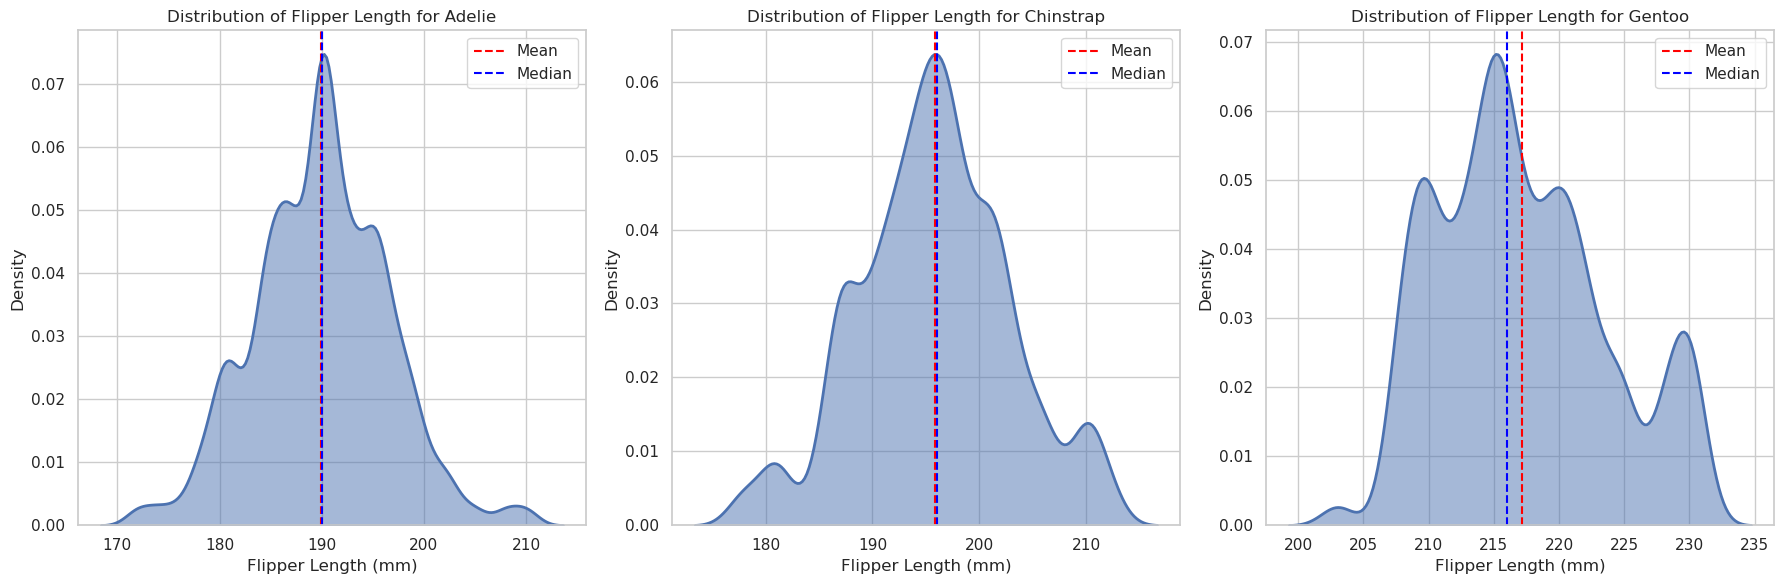

In [3]:
# Q2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset from the provided URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm'
df = df.dropna(subset=['flipper_length_mm'])

# Set the style for the plots
sns.set(style="whitegrid")

# Create a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define species to plot
species = df['species'].unique()

# Loop through the species to create KDE plots
for ax, spec in zip(axes, species):
    sns.kdeplot(data=df[df['species'] == spec], x='flipper_length_mm', ax=ax,
                 fill=True, bw_adjust=0.5, alpha=0.5, linewidth=2)
    ax.set_title(f'Distribution of Flipper Length for {spec}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.axvline(df[df['species'] == spec]['flipper_length_mm'].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[df['species'] == spec]['flipper_length_mm'].median(), color='blue', linestyle='--', label='Median')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Q3
# Representation:
#        Histogram: Displays data in discrete bins, showing the frequency of data points within each bin, which can lead to a blocky appearance influenced by bin size.
#        KDE: Provides a smooth, continuous curve that estimates the probability density function, offering a clearer view of the underlying distribution without the limitations of binning.
# Visual Clarity:
#       Histogram: May obscure finer details due to its segmented nature, making it harder to identify patterns, especially in larger datasets.
#       KDE: Better suited for visualizing the shape of the distribution, including peaks and valleys, leading to a more intuitive understanding of the data.
# Sensitivity to Parameters:
#       Histogram: Highly dependent on bin width and placement, which can significantly alter the representation of the data.
#       KDE: Less sensitive to specific parameter choices, as it generates a smooth estimate that remains consistent across various bandwidth selections.

In [39]:
# Q4
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate mean and variance for each dataset
data_stats = {
    'A': (np.mean(data1), np.var(data1)),
    'B': (np.mean(data2), np.var(data2)),
    'C': (np.mean(data3), np.var(data3)),
    'D': (np.mean(data4), np.var(data4))
}

fig = make_subplots(rows=1, cols=4)

# Create histograms
for i, (key, (mean, var)) in enumerate(data_stats.items(), start=1):
    fig.add_trace(go.Histogram(
        x=eval(f'data{i}'),
        name=key,
        nbinsx=30 if key != 'C' else 45,
        marker=dict(line=dict(color='black', width=1))
    ), row=1, col=i)
    
    # Add mean and variance annotations
    fig.add_annotation(
        x=mean,
        y=0,  # Adjust this to position the annotation correctly
        text=f'Mean: {mean:.2f}<br>Var: {var:.2f}',
        showarrow=True,
        arrowhead=2,
        ax=-30,
        ay=-40,
        row=1,
        col=i
    )

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

fig.show()  # USE fig.show(renderer="png") FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
# Dataset A: Mean ≈ 4.99, Variance ≈ 8.35
# Dataset B: Mean ≈ 4.99, Variance ≈ 2.04
# Dataset C: Mean ≈ 5.01, Variance ≈ 9.22
# Dataset D: Mean ≈ 6.01, Variance ≈ 0.25
# A and C have similar means(4.99&5.01) and similar variances(8.35&9.22)(similar compared to the other dataset)
# Datasets A and B: Similar means (≈ 4.99) but quite different variances (8.35 vs. 2.04).
# None of the datasets show similar variances but different means.
# Datasets C and D: They have quite different means (≈ 5.01 vs. ≈ 6.01) and quite different variances (≈ 9.22 vs. ≈ 0.25).

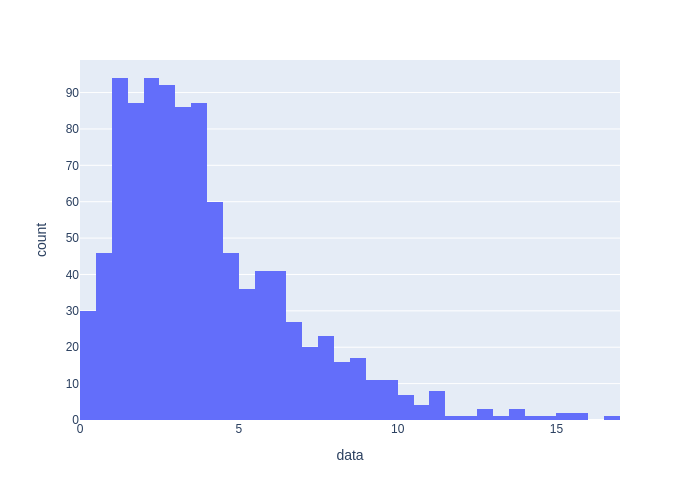

(3.9587291539737546, 3.318502087363513)

In [4]:
# Q5
# Generate Right-Skewed Data (Gamma Distribution)
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Visualizing the right-skewed distribution
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")  # Use PNG rendering for GitHub/MarkUs submissions

# Calculating mean and median of the right-skewed data
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]  # Median

# Display the mean and median
mean1, median1

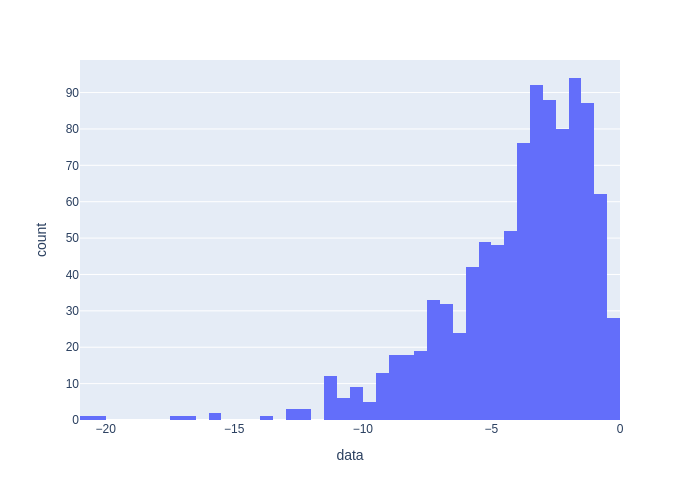

(-3.9989292391135214, -3.3655483833270914)

In [6]:
# Generate Left-Skewed Data (Negative of Gamma Distribution)

sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Visualizing the left-skewed distribution
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")  # Use PNG rendering for GitHub/MarkUs submissions

# Calculating mean and median of the left-skewed data
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]  # Median

# Display the mean and median
mean2, median2

In [ ]:
# In the right-skewed data, the mean is greater than the median. Because mean are more susceptible to the right outlier(make mean higher),median are more resistant to these outliers.
# In the left-skewed data, the mean is less than the median. Because mean are more susceptible to the left outlier(make mean lower),median are more resistant to these outliers.

In [53]:
# Q6
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Add species column
iris_df['species'] = pd.Categorical.from_codes(iris['target'], iris['target_names'])

# Calculate summary statistics
summary_stats = iris_df.describe()

# Print summary statistics
print(summary_stats)


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


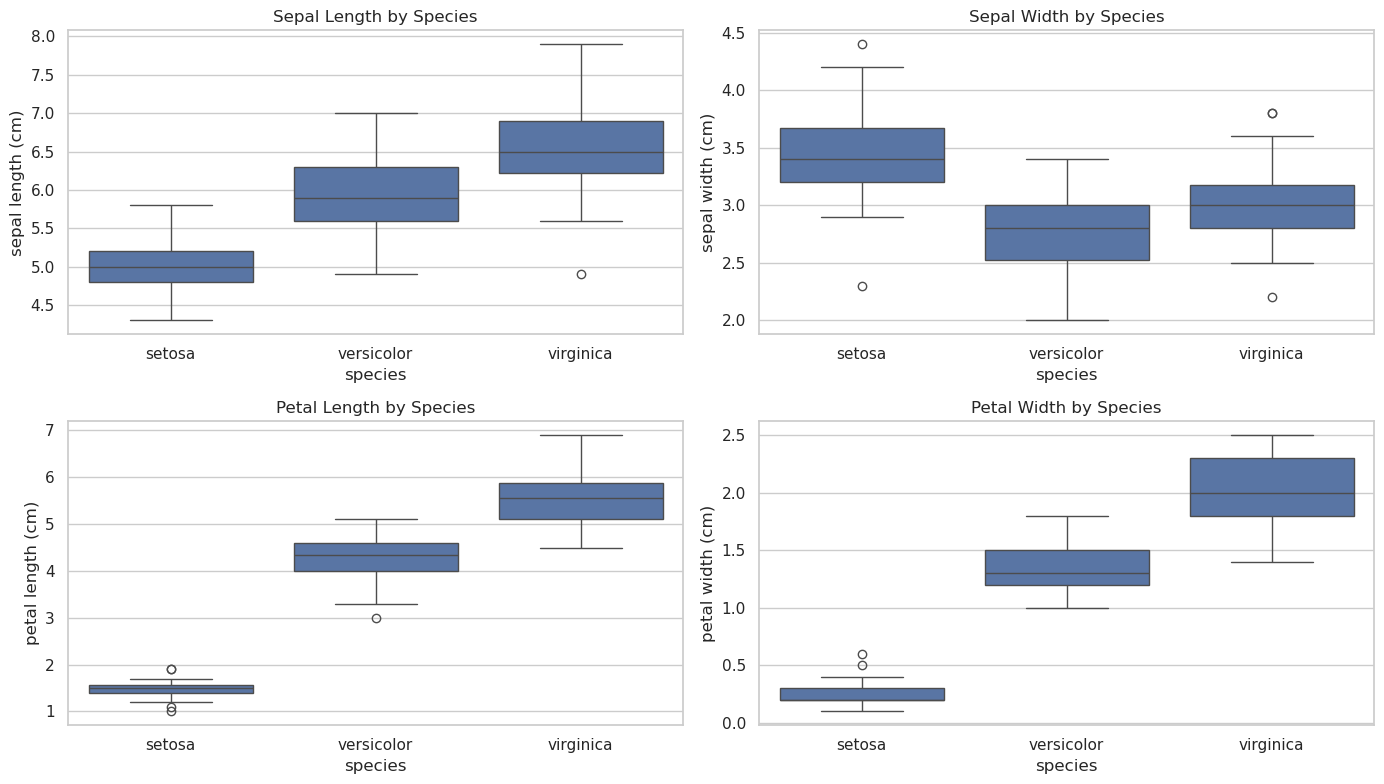

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['species'] = pd.Categorical.from_codes(iris['target'], iris['target_names'])

# Set up the figure size
plt.figure(figsize=(14, 8))

# Subplot 1: Sepal Length
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title("Sepal Length by Species")

# Subplot 2: Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df)
plt.title("Sepal Width by Species")

# Subplot 3: Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
plt.title("Petal Length by Species")

# Subplot 4: Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal width (cm)', data=iris_df)
plt.title("Petal Width by Species")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
# The summary statistics and visualizations of the lris dataset provide some interesting initial insights
# 1. Sepal and Petal Differences:
# The mean sepal length is around 5.84 cm, while the mean petal length is 3.76 cmhere is a significant variation in petal length (std: 1.77 cm), much larger than the variation in sepal length (std: 0.83 cm)
# 2. Sepal Width:
# Sepal width has a mean of 3.06 cm with relatively low variation compared to the other features.
# 3. Minimum and Maximum Values:
# The petal length varies from 1 cm to 6.9 cm, showing the wide range across different iris species.

In [21]:
# Q7
# Import required libraries
import plotly.express as px
import pandas as pd

# Load Gapminder dataset from Plotly
df = px.data.gapminder()

# Create the animated bubble chart
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=55, 
                 range_x=[100, 100000], 
                 range_y=[25, 90],
                 title="Gapminder Animation: Life Expectancy vs. GDP Per Capita")

# Customize the style
fig.update_layout(xaxis_title="GDP per Capita (log scale)", 
                  yaxis_title="Life Expectancy",
                  template="plotly_white")

# Show the figure
fig.show()

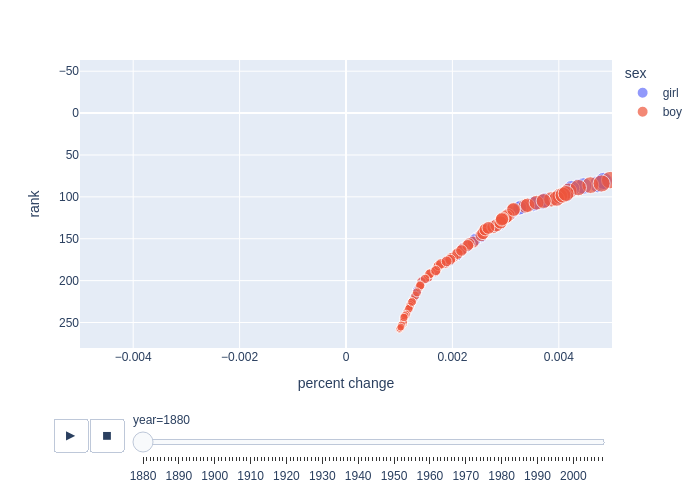

In [24]:
# Q8
# Import required libraries
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct by appending the sex
bn['name'] = bn['name'] + " " + bn['sex']

# Create rank based on the percent of each name per year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort values by name and year for calculating percentage change
bn = bn.sort_values(['name', 'year'])

# Calculate the percent change from the previous year
bn['percent change'] = bn['percent'].diff()

# Mark new names (where there is no previous year) with the current percent
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort by year again for plotting
bn = bn.sort_values('year')

# Restrict the data to common names (percent > 0.001)
bn = bn[bn.percent > 0.001]

# Create the animated scatter plot
fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name",
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

# Reverse the y-axis to have rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Show the plot
fig.show(renderer="png")  # Use 'png' renderer for GitHub or other platforms that require static images


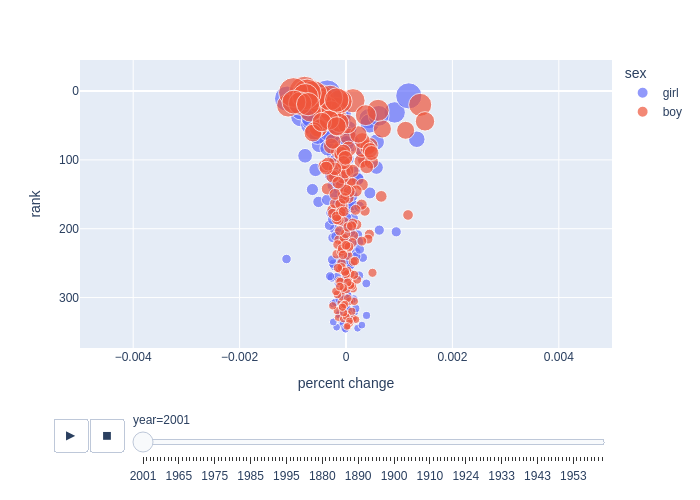

In [25]:
# Import required libraries
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Distinguish identical boy and girl names
bn['name'] = bn['name'] + " " + bn['sex']

# Create rank based on the percent of each name per year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort values by name and year, calculate percentage change
bn = bn.sort_values(['name', 'year'])
bn['percent change'] = bn['percent'].diff()

# Fill initial percent change for new names
new_name = bn['name'] != bn['name'].shift(1)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Filter common names (percent > 0.001)
bn = bn[bn['percent'] > 0.001]

# Create the animated scatter plot
fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name",
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])

# Reverse the y-axis to have rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Show the plot
fig.show(renderer="png")  # Render as a PNG for GitHub or static platforms


In [5]:
# Q9 maybe
# https://chatgpt.com/share/66f4e47b-a634-8013-a05e-12d5f510baf1
# https://chatgpt.com/share/66f5e007-e46c-8013-95cd-6a7bb5f6fc58
